# Setup

Game: https://gym.openai.com/envs/Acrobot-v1/

In [1]:
import tensorflow 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam


import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.animation as animation
mpl.rc('animation', html='jshtml')

import random
import numpy as np

import gym

In [2]:
try:
    import pyvirtualdisplay
    display = pyvirtualdisplay.Display(visible=0, size=(1400, 900)).start()
except ImportError:
    pass

# Network

In [3]:
gamma = 0.95
alpha = 0.50
learning_rate = 0.01
epsilon = 0.999
epsilon_decay = 0.90

class DQN:

    def __init__(self, observation_space, action_space):
        
        self.epsilon = epsilon
        self.alpha = alpha
        self.gamma = gamma
        self.action_space = action_space
        self.observation_space = observation_space
        
        self.memory = []
        self.batch_size = 8

        self.model = Sequential()
        self.model.add(Dense(32, input_shape=(observation_space,), activation="selu", kernel_initializer='lecun_normal'))
        self.model.add(Dense(64, activation="selu", kernel_initializer='lecun_normal'))
        self.model.add(Dense(16, activation="selu", kernel_initializer='lecun_normal'))
        self.model.add(Dense(8, activation="selu", kernel_initializer='lecun_normal'))
        self.model.add(Dropout(0.1))
        self.model.add(BatchNormalization())
        self.model.add(Dense(self.action_space, activation="linear"))
        self.model.compile(loss="mse", optimizer=Adam(lr=learning_rate))
    
    def act(self, state):
        if np.random.rand() < self.epsilon:
            return random.randrange(self.action_space)
        q = self.model.predict(state)
        return np.argmax(q[0])

    def experience_replay(self):
        print(self.memory,self.batch_size)
        mem_sample = random.sample(self.memory, min(len(self.memory), self.batch_size))
        for state, action, reward, next_state, done in mem_sample:
            update_value = reward
            print(update_value)
            if not done:
                update_value = self.alpha * (reward + self.gamma * np.max(self.model.predict(next_state)[0]))
            q = self.model.predict(state)
            q[0][action] = update_value
            self.model.fit(np.array(state), q, verbose=0)
        self.epsilon *= epsilon_decay
        
    def remember(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))

# Run & Train

In [4]:
stop = 0
frames = []
scores = []

def run_game():
    env = gym.make("Acrobot-v1")
    env.seed(21)
    observation_space, action_space = env.observation_space.shape[0], env.action_space.n
    epoch = 0
    dqn = DQN(observation_space, action_space)

    for step in range(25):
        score = 0
        epoch += 1
        state = env.reset()
        state = np.reshape(state, [1, observation_space])
        while True:
            img = env.render(mode="rgb_array")
            score += 1
            action = dqn.act(state)
            next_state, reward, done, info = env.step(action)
            reward = reward if not done else -reward
            next_state = np.reshape(next_state, [1, observation_space])
            frames.append(img)
            dqn.experience_replay()
            state = next_state
            if score > 5:
                scores.append(score)
                print ("Round: " + str(epoch) + " Score: " + str(score))
                break
            dqn.remember(state, action, reward, next_state, done)
    return dqn, scores


In [5]:
dqn, scores = run_game()

[] 8
[(array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), 2, -1.0, array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), False)] 8
-1.0
[(array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), 2, -1.0, array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), False), (array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), 2, -1.0, array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), False)] 8
-1.0
-1.0
[(array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), 2, -1.0, array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), False), (array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), 2, -1.0, array([[ 0.9997741

        -0.3240757 ]]), False)] 8
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
[(array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), 2, -1.0, array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), False), (array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), 2, -1.0, array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), False), (array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), 1, -1.0, array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), False), (array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), 2, -1.0, array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), False), (array([[ 0.99901064, -0.04447176,  0.9402683 ,  0.34043433,  0.05904256,
   

        -0.24726738]]), False)] 8
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
[(array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), 2, -1.0, array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), False), (array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), 2, -1.0, array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), False), (array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), 1, -1.0, array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), False), (array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), 2, -1.0, array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), False), (array([[ 0.99901064, -0.04447176,  0.9402683 ,  0.34043433,  0.05904256,
   

        -0.6136343 ]]), False)] 8
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
[(array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), 2, -1.0, array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), False), (array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), 2, -1.0, array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), False), (array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), 1, -1.0, array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), False), (array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), 2, -1.0, array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), False), (array([[ 0.99901064, -0.04447176,  0.9402683 ,  0.34043433,  0.05904256,
   

        -0.23498864]]), False)] 8
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
[(array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), 2, -1.0, array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), False), (array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), 2, -1.0, array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), False), (array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), 1, -1.0, array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), False), (array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), 2, -1.0, array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), False), (array([[ 0.99901064, -0.04447176,  0.9402683 ,  0.34043433,  0.05904256,
   

        -0.21793452]]), False)] 8
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
[(array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), 2, -1.0, array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), False), (array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), 2, -1.0, array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), False), (array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), 1, -1.0, array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), False), (array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), 2, -1.0, array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), False), (array([[ 0.99901064, -0.04447176,  0.9402683 ,  0.34043433,  0.05904256,
   

         0.29068171]]), False)] 8
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
[(array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), 2, -1.0, array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), False), (array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), 2, -1.0, array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), False), (array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), 1, -1.0, array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), False), (array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), 2, -1.0, array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), False), (array([[ 0.99901064, -0.04447176,  0.9402683 ,  0.34043433,  0.05904256,
   

         0.1243918 ]]), False)] 8
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
[(array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), 2, -1.0, array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), False), (array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), 2, -1.0, array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), False), (array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), 1, -1.0, array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), False), (array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), 2, -1.0, array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), False), (array([[ 0.99901064, -0.04447176,  0.9402683 ,  0.34043433,  0.05904256,
   

        -0.01887951]]), False)] 8
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
[(array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), 2, -1.0, array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), False), (array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), 2, -1.0, array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), False), (array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), 1, -1.0, array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), False), (array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), 2, -1.0, array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), False), (array([[ 0.99901064, -0.04447176,  0.9402683 ,  0.34043433,  0.05904256,
   

        -0.15147971]]), False)] 8
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
[(array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), 2, -1.0, array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), False), (array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), 2, -1.0, array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), False), (array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), 1, -1.0, array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), False), (array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), 2, -1.0, array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), False), (array([[ 0.99901064, -0.04447176,  0.9402683 ,  0.34043433,  0.05904256,
   

         0.40623007]]), False)] 8
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
[(array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), 2, -1.0, array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), False), (array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), 2, -1.0, array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), False), (array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), 1, -1.0, array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), False), (array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), 2, -1.0, array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), False), (array([[ 0.99901064, -0.04447176,  0.9402683 ,  0.34043433,  0.05904256,
   

         0.56964238]]), False)] 8
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
[(array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), 2, -1.0, array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), False), (array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), 2, -1.0, array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), False), (array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), 1, -1.0, array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), False), (array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), 2, -1.0, array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), False), (array([[ 0.99901064, -0.04447176,  0.9402683 ,  0.34043433,  0.05904256,
   

         0.481125  ]]), False)] 8
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
[(array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), 2, -1.0, array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), False), (array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), 2, -1.0, array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), False), (array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), 1, -1.0, array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), False), (array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), 2, -1.0, array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), False), (array([[ 0.99901064, -0.04447176,  0.9402683 ,  0.34043433,  0.05904256,
   

         0.46852388]]), False)] 8
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
[(array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), 2, -1.0, array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), False), (array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), 2, -1.0, array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), False), (array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), 1, -1.0, array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), False), (array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), 2, -1.0, array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), False), (array([[ 0.99901064, -0.04447176,  0.9402683 ,  0.34043433,  0.05904256,
   

        -0.12271466]]), False)] 8
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
[(array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), 2, -1.0, array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), False), (array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), 2, -1.0, array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), False), (array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), 1, -1.0, array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), False), (array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), 2, -1.0, array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), False), (array([[ 0.99901064, -0.04447176,  0.9402683 ,  0.34043433,  0.05904256,
   

        -0.77671161]]), False)] 8
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
[(array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), 2, -1.0, array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), False), (array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), 2, -1.0, array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), False), (array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), 1, -1.0, array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), False), (array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), 2, -1.0, array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), False), (array([[ 0.99901064, -0.04447176,  0.9402683 ,  0.34043433,  0.05904256,
   

         0.25802982]]), False)] 8
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
[(array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), 2, -1.0, array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), False), (array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), 2, -1.0, array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), False), (array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), 1, -1.0, array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), False), (array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), 2, -1.0, array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), False), (array([[ 0.99901064, -0.04447176,  0.9402683 ,  0.34043433,  0.05904256,
   

         0.10316964]]), False)] 8
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
[(array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), 2, -1.0, array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), False), (array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), 2, -1.0, array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), False), (array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), 1, -1.0, array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), False), (array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), 2, -1.0, array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), False), (array([[ 0.99901064, -0.04447176,  0.9402683 ,  0.34043433,  0.05904256,
   

        -0.0724473 ]]), False)] 8
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
Round: 8 Score: 6
[(array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), 2, -1.0, array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), False), (array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), 2, -1.0, array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), False), (array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), 1, -1.0, array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), False), (array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), 2, -1.0, array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), False), (array([[ 0.99901064, -0.04447176,  0.9402683 ,  0.34043433

        -0.0724473 ]]), False)] 8
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
[(array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), 2, -1.0, array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), False), (array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), 2, -1.0, array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), False), (array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), 1, -1.0, array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), False), (array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), 2, -1.0, array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), False), (array([[ 0.99901064, -0.04447176,  0.9402683 ,  0.34043433,  0.05904256,
   

        -0.05082654]]), False)] 8
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
[(array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), 2, -1.0, array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), False), (array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), 2, -1.0, array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), False), (array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), 1, -1.0, array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), False), (array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), 2, -1.0, array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), False), (array([[ 0.99901064, -0.04447176,  0.9402683 ,  0.34043433,  0.05904256,
   

        -0.08848972]]), False)] 8
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
[(array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), 2, -1.0, array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), False), (array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), 2, -1.0, array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), False), (array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), 1, -1.0, array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), False), (array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), 2, -1.0, array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), False), (array([[ 0.99901064, -0.04447176,  0.9402683 ,  0.34043433,  0.05904256,
   

        -0.11859463]]), False)] 8
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
[(array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), 2, -1.0, array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), False), (array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), 2, -1.0, array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), False), (array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), 1, -1.0, array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), False), (array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), 2, -1.0, array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), False), (array([[ 0.99901064, -0.04447176,  0.9402683 ,  0.34043433,  0.05904256,
   

        -0.1366748 ]]), False)] 8
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
[(array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), 2, -1.0, array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), False), (array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), 2, -1.0, array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), False), (array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), 1, -1.0, array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), False), (array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), 2, -1.0, array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), False), (array([[ 0.99901064, -0.04447176,  0.9402683 ,  0.34043433,  0.05904256,
   

        -0.13857146]]), False)] 8
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
Round: 9 Score: 6
[(array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), 2, -1.0, array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), False), (array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), 2, -1.0, array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), False), (array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), 1, -1.0, array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), False), (array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), 2, -1.0, array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), False), (array([[ 0.99901064, -0.04447176,  0.9402683 ,  0.34043433

        -0.13857146]]), False)] 8
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
[(array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), 2, -1.0, array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), False), (array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), 2, -1.0, array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), False), (array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), 1, -1.0, array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), False), (array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), 2, -1.0, array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), False), (array([[ 0.99901064, -0.04447176,  0.9402683 ,  0.34043433,  0.05904256,
   

         0.09149902]]), False)] 8
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
[(array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), 2, -1.0, array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), False), (array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), 2, -1.0, array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), False), (array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), 1, -1.0, array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), False), (array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), 2, -1.0, array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), False), (array([[ 0.99901064, -0.04447176,  0.9402683 ,  0.34043433,  0.05904256,
   

         0.25440707]]), False)] 8
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
[(array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), 2, -1.0, array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), False), (array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), 2, -1.0, array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), False), (array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), 1, -1.0, array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), False), (array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), 2, -1.0, array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), False), (array([[ 0.99901064, -0.04447176,  0.9402683 ,  0.34043433,  0.05904256,
   

         0.37000875]]), False)] 8
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
[(array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), 2, -1.0, array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), False), (array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), 2, -1.0, array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), False), (array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), 1, -1.0, array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), False), (array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), 2, -1.0, array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), False), (array([[ 0.99901064, -0.04447176,  0.9402683 ,  0.34043433,  0.05904256,
   

         0.41290628]]), False)] 8
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
[(array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), 2, -1.0, array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), False), (array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), 2, -1.0, array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), False), (array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), 1, -1.0, array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), False), (array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), 2, -1.0, array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), False), (array([[ 0.99901064, -0.04447176,  0.9402683 ,  0.34043433,  0.05904256,
   

         0.37645312]]), False)] 8
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
Round: 10 Score: 6
[(array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), 2, -1.0, array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), False), (array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), 2, -1.0, array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), False), (array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), 1, -1.0, array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), False), (array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), 2, -1.0, array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), False), (array([[ 0.99901064, -0.04447176,  0.9402683 ,  0.3404343

         0.37645312]]), False)] 8
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
[(array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), 2, -1.0, array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), False), (array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), 2, -1.0, array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), False), (array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), 1, -1.0, array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), False), (array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), 2, -1.0, array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), False), (array([[ 0.99901064, -0.04447176,  0.9402683 ,  0.34043433,  0.05904256,
   

         0.46732381]]), False)] 8
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
[(array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), 2, -1.0, array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), False), (array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), 2, -1.0, array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), False), (array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), 1, -1.0, array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), False), (array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), 2, -1.0, array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), False), (array([[ 0.99901064, -0.04447176,  0.9402683 ,  0.34043433,  0.05904256,
   

         0.05424226]]), False)] 8
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
[(array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), 2, -1.0, array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), False), (array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), 2, -1.0, array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), False), (array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), 1, -1.0, array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), False), (array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), 2, -1.0, array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), False), (array([[ 0.99901064, -0.04447176,  0.9402683 ,  0.34043433,  0.05904256,
   

         0.28161607]]), False)] 8
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
[(array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), 2, -1.0, array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), False), (array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), 2, -1.0, array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), False), (array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), 1, -1.0, array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), False), (array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), 2, -1.0, array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), False), (array([[ 0.99901064, -0.04447176,  0.9402683 ,  0.34043433,  0.05904256,
   

         0.41927755]]), False)] 8
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
[(array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), 2, -1.0, array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), False), (array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), 2, -1.0, array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), False), (array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), 1, -1.0, array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), False), (array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), 2, -1.0, array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), False), (array([[ 0.99901064, -0.04447176,  0.9402683 ,  0.34043433,  0.05904256,
   

         0.43526343]]), False)] 8
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
Round: 11 Score: 6
[(array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), 2, -1.0, array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), False), (array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), 2, -1.0, array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), False), (array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), 1, -1.0, array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), False), (array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), 2, -1.0, array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), False), (array([[ 0.99901064, -0.04447176,  0.9402683 ,  0.3404343

         0.43526343]]), False)] 8
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
[(array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), 2, -1.0, array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), False), (array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), 2, -1.0, array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), False), (array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), 1, -1.0, array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), False), (array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), 2, -1.0, array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), False), (array([[ 0.99901064, -0.04447176,  0.9402683 ,  0.34043433,  0.05904256,
   

         1.00886833e-01, -2.11826729e-02,  2.00337881e-01]]), False)] 8
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
[(array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), 2, -1.0, array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), False), (array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), 2, -1.0, array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), False), (array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), 1, -1.0, array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), False), (array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), 2, -1.0, array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), False), (array([[ 0.99901064, -0.04447176,  0.9

         0.40967586]]), False)] 8
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
[(array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), 2, -1.0, array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), False), (array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), 2, -1.0, array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), False), (array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), 1, -1.0, array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), False), (array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), 2, -1.0, array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), False), (array([[ 0.99901064, -0.04447176,  0.9402683 ,  0.34043433,  0.05904256,
   

         0.51075872]]), False)] 8
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
[(array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), 2, -1.0, array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), False), (array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), 2, -1.0, array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), False), (array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), 1, -1.0, array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), False), (array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), 2, -1.0, array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), False), (array([[ 0.99901064, -0.04447176,  0.9402683 ,  0.34043433,  0.05904256,
   

         0.47494498]]), False)] 8
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
[(array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), 2, -1.0, array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), False), (array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), 2, -1.0, array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), False), (array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), 1, -1.0, array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), False), (array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), 2, -1.0, array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), False), (array([[ 0.99901064, -0.04447176,  0.9402683 ,  0.34043433,  0.05904256,
   

         0.31596757]]), False)] 8
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
Round: 12 Score: 6
[(array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), 2, -1.0, array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), False), (array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), 2, -1.0, array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), False), (array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), 1, -1.0, array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), False), (array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), 2, -1.0, array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), False), (array([[ 0.99901064, -0.04447176,  0.9402683 ,  0.3404343

         0.31596757]]), False)] 8
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
[(array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), 2, -1.0, array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), False), (array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), 2, -1.0, array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), False), (array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), 1, -1.0, array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), False), (array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), 2, -1.0, array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), False), (array([[ 0.99901064, -0.04447176,  0.9402683 ,  0.34043433,  0.05904256,
   

         0.45116771]]), False)] 8
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
[(array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), 2, -1.0, array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), False), (array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), 2, -1.0, array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), False), (array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), 1, -1.0, array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), False), (array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), 2, -1.0, array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), False), (array([[ 0.99901064, -0.04447176,  0.9402683 ,  0.34043433,  0.05904256,
   

         0.051619  ]]), False)] 8
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
[(array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), 2, -1.0, array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), False), (array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), 2, -1.0, array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), False), (array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), 1, -1.0, array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), False), (array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), 2, -1.0, array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), False), (array([[ 0.99901064, -0.04447176,  0.9402683 ,  0.34043433,  0.05904256,
   

        -0.04322601]]), False)] 8
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
[(array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), 2, -1.0, array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), False), (array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), 2, -1.0, array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), False), (array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), 1, -1.0, array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), False), (array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), 2, -1.0, array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), False), (array([[ 0.99901064, -0.04447176,  0.9402683 ,  0.34043433,  0.05904256,
   

        -0.14778434]]), False)] 8
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
[(array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), 2, -1.0, array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), False), (array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), 2, -1.0, array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), False), (array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), 1, -1.0, array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), False), (array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), 2, -1.0, array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), False), (array([[ 0.99901064, -0.04447176,  0.9402683 ,  0.34043433,  0.05904256,
   

        -0.23557012]]), False)] 8
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
Round: 13 Score: 6
[(array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), 2, -1.0, array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), False), (array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), 2, -1.0, array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), False), (array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), 1, -1.0, array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), False), (array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), 2, -1.0, array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), False), (array([[ 0.99901064, -0.04447176,  0.9402683 ,  0.3404343

        -0.23557012]]), False)] 8
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
[(array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), 2, -1.0, array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), False), (array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), 2, -1.0, array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), False), (array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), 1, -1.0, array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), False), (array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), 2, -1.0, array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), False), (array([[ 0.99901064, -0.04447176,  0.9402683 ,  0.34043433,  0.05904256,
   

         0.34219191]]), False)] 8
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
[(array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), 2, -1.0, array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), False), (array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), 2, -1.0, array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), False), (array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), 1, -1.0, array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), False), (array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), 2, -1.0, array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), False), (array([[ 0.99901064, -0.04447176,  0.9402683 ,  0.34043433,  0.05904256,
   

         0.61718351]]), False)] 8
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
[(array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), 2, -1.0, array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), False), (array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), 2, -1.0, array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), False), (array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), 1, -1.0, array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), False), (array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), 2, -1.0, array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), False), (array([[ 0.99901064, -0.04447176,  0.9402683 ,  0.34043433,  0.05904256,
   

         0.75061638]]), False)] 8
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
[(array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), 2, -1.0, array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), False), (array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), 2, -1.0, array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), False), (array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), 1, -1.0, array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), False), (array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), 2, -1.0, array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), False), (array([[ 0.99901064, -0.04447176,  0.9402683 ,  0.34043433,  0.05904256,
   

         0.71127611]]), False)] 8
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
[(array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), 2, -1.0, array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), False), (array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), 2, -1.0, array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), False), (array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), 1, -1.0, array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), False), (array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), 2, -1.0, array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), False), (array([[ 0.99901064, -0.04447176,  0.9402683 ,  0.34043433,  0.05904256,
   

         0.52259642]]), False)] 8
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
Round: 14 Score: 6
[(array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), 2, -1.0, array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), False), (array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), 2, -1.0, array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), False), (array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), 1, -1.0, array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), False), (array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), 2, -1.0, array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), False), (array([[ 0.99901064, -0.04447176,  0.9402683 ,  0.3404343

         0.52259642]]), False)] 8
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
[(array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), 2, -1.0, array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), False), (array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), 2, -1.0, array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), False), (array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), 1, -1.0, array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), False), (array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), 2, -1.0, array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), False), (array([[ 0.99901064, -0.04447176,  0.9402683 ,  0.34043433,  0.05904256,
   

         0.24301833]]), False)] 8
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
[(array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), 2, -1.0, array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), False), (array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), 2, -1.0, array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), False), (array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), 1, -1.0, array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), False), (array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), 2, -1.0, array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), False), (array([[ 0.99901064, -0.04447176,  0.9402683 ,  0.34043433,  0.05904256,
   

         0.48104748]]), False)] 8
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
[(array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), 2, -1.0, array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), False), (array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), 2, -1.0, array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), False), (array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), 1, -1.0, array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), False), (array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), 2, -1.0, array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), False), (array([[ 0.99901064, -0.04447176,  0.9402683 ,  0.34043433,  0.05904256,
   

         0.61331878]]), False)] 8
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
[(array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), 2, -1.0, array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), False), (array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), 2, -1.0, array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), False), (array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), 1, -1.0, array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), False), (array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), 2, -1.0, array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), False), (array([[ 0.99901064, -0.04447176,  0.9402683 ,  0.34043433,  0.05904256,
   

         0.61060319]]), False)] 8
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
[(array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), 2, -1.0, array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), False), (array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), 2, -1.0, array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), False), (array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), 1, -1.0, array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), False), (array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), 2, -1.0, array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), False), (array([[ 0.99901064, -0.04447176,  0.9402683 ,  0.34043433,  0.05904256,
   

         0.48384025]]), False)] 8
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
Round: 15 Score: 6
[(array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), 2, -1.0, array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), False), (array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), 2, -1.0, array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), False), (array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), 1, -1.0, array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), False), (array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), 2, -1.0, array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), False), (array([[ 0.99901064, -0.04447176,  0.9402683 ,  0.3404343

         0.48384025]]), False)] 8
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
[(array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), 2, -1.0, array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), False), (array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), 2, -1.0, array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), False), (array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), 1, -1.0, array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), False), (array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), 2, -1.0, array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), False), (array([[ 0.99901064, -0.04447176,  0.9402683 ,  0.34043433,  0.05904256,
   

        -0.0399284 ]]), False)] 8
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
[(array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), 2, -1.0, array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), False), (array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), 2, -1.0, array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), False), (array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), 1, -1.0, array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), False), (array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), 2, -1.0, array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), False), (array([[ 0.99901064, -0.04447176,  0.9402683 ,  0.34043433,  0.05904256,
   

        -0.35029553]]), False)] 8
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
[(array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), 2, -1.0, array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), False), (array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), 2, -1.0, array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), False), (array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), 1, -1.0, array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), False), (array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), 2, -1.0, array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), False), (array([[ 0.99901064, -0.04447176,  0.9402683 ,  0.34043433,  0.05904256,
   

        -0.6058421 ]]), False)] 8
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
[(array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), 2, -1.0, array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), False), (array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), 2, -1.0, array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), False), (array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), 1, -1.0, array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), False), (array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), 2, -1.0, array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), False), (array([[ 0.99901064, -0.04447176,  0.9402683 ,  0.34043433,  0.05904256,
   

        -0.73617981]]), False)] 8
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
[(array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), 2, -1.0, array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), False), (array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), 2, -1.0, array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), False), (array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), 1, -1.0, array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), False), (array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), 2, -1.0, array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), False), (array([[ 0.99901064, -0.04447176,  0.9402683 ,  0.34043433,  0.05904256,
   

        -0.70742099]]), False)] 8
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
Round: 16 Score: 6
[(array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), 2, -1.0, array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), False), (array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), 2, -1.0, array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), False), (array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), 1, -1.0, array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), False), (array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), 2, -1.0, array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), False), (array([[ 0.99901064, -0.04447176,  0.9402683 ,  0.3404343

        -0.70742099]]), False)] 8
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
[(array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), 2, -1.0, array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), False), (array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), 2, -1.0, array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), False), (array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), 1, -1.0, array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), False), (array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), 2, -1.0, array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), False), (array([[ 0.99901064, -0.04447176,  0.9402683 ,  0.34043433,  0.05904256,
   

         0.41297169]]), False)] 8
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
[(array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), 2, -1.0, array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), False), (array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), 2, -1.0, array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), False), (array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), 1, -1.0, array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), False), (array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), 2, -1.0, array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), False), (array([[ 0.99901064, -0.04447176,  0.9402683 ,  0.34043433,  0.05904256,
   

         0.63730182]]), False)] 8
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
[(array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), 2, -1.0, array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), False), (array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), 2, -1.0, array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), False), (array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), 1, -1.0, array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), False), (array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), 2, -1.0, array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), False), (array([[ 0.99901064, -0.04447176,  0.9402683 ,  0.34043433,  0.05904256,
   

         0.67261545]]), False)] 8
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
[(array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), 2, -1.0, array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), False), (array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), 2, -1.0, array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), False), (array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), 1, -1.0, array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), False), (array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), 2, -1.0, array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), False), (array([[ 0.99901064, -0.04447176,  0.9402683 ,  0.34043433,  0.05904256,
   

         0.51190845]]), False)] 8
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
[(array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), 2, -1.0, array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), False), (array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), 2, -1.0, array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), False), (array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), 1, -1.0, array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), False), (array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), 2, -1.0, array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), False), (array([[ 0.99901064, -0.04447176,  0.9402683 ,  0.34043433,  0.05904256,
   

         0.20877905]]), False)] 8
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
Round: 17 Score: 6
[(array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), 2, -1.0, array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), False), (array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), 2, -1.0, array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), False), (array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), 1, -1.0, array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), False), (array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), 2, -1.0, array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), False), (array([[ 0.99901064, -0.04447176,  0.9402683 ,  0.3404343

         0.20877905]]), False)] 8
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
[(array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), 2, -1.0, array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), False), (array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), 2, -1.0, array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), False), (array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), 1, -1.0, array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), False), (array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), 2, -1.0, array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), False), (array([[ 0.99901064, -0.04447176,  0.9402683 ,  0.34043433,  0.05904256,
   

         0.27268522]]), False)] 8
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
[(array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), 2, -1.0, array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), False), (array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), 2, -1.0, array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), False), (array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), 1, -1.0, array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), False), (array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), 2, -1.0, array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), False), (array([[ 0.99901064, -0.04447176,  0.9402683 ,  0.34043433,  0.05904256,
   

         0.44866888]]), False)] 8
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
[(array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), 2, -1.0, array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), False), (array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), 2, -1.0, array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), False), (array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), 1, -1.0, array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), False), (array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), 2, -1.0, array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), False), (array([[ 0.99901064, -0.04447176,  0.9402683 ,  0.34043433,  0.05904256,
   

         0.50748494]]), False)] 8
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
[(array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), 2, -1.0, array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), False), (array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), 2, -1.0, array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), False), (array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), 1, -1.0, array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), False), (array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), 2, -1.0, array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), False), (array([[ 0.99901064, -0.04447176,  0.9402683 ,  0.34043433,  0.05904256,
   

         0.4437144 ]]), False)] 8
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
[(array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), 2, -1.0, array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), False), (array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), 2, -1.0, array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), False), (array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), 1, -1.0, array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), False), (array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), 2, -1.0, array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), False), (array([[ 0.99901064, -0.04447176,  0.9402683 ,  0.34043433,  0.05904256,
   

         0.28687184]]), False)] 8
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
Round: 18 Score: 6
[(array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), 2, -1.0, array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), False), (array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), 2, -1.0, array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), False), (array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), 1, -1.0, array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), False), (array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), 2, -1.0, array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), False), (array([[ 0.99901064, -0.04447176,  0.9402683 ,  0.3404343

         0.28687184]]), False)] 8
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
[(array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), 2, -1.0, array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), False), (array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), 2, -1.0, array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), False), (array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), 1, -1.0, array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), False), (array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), 2, -1.0, array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), False), (array([[ 0.99901064, -0.04447176,  0.9402683 ,  0.34043433,  0.05904256,
   

         0.29677932]]), False)] 8
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
[(array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), 2, -1.0, array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), False), (array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), 2, -1.0, array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), False), (array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), 1, -1.0, array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), False), (array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), 2, -1.0, array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), False), (array([[ 0.99901064, -0.04447176,  0.9402683 ,  0.34043433,  0.05904256,
   

         0.50123892]]), False)] 8
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
[(array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), 2, -1.0, array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), False), (array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), 2, -1.0, array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), False), (array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), 1, -1.0, array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), False), (array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), 2, -1.0, array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), False), (array([[ 0.99901064, -0.04447176,  0.9402683 ,  0.34043433,  0.05904256,
   

         0.59162341]]), False)] 8
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
[(array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), 2, -1.0, array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), False), (array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), 2, -1.0, array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), False), (array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), 1, -1.0, array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), False), (array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), 2, -1.0, array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), False), (array([[ 0.99901064, -0.04447176,  0.9402683 ,  0.34043433,  0.05904256,
   

         0.55329471]]), False)] 8
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
[(array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), 2, -1.0, array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), False), (array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), 2, -1.0, array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), False), (array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), 1, -1.0, array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), False), (array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), 2, -1.0, array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), False), (array([[ 0.99901064, -0.04447176,  0.9402683 ,  0.34043433,  0.05904256,
   

         0.40859545]]), False)] 8
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
Round: 19 Score: 6
[(array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), 2, -1.0, array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), False), (array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), 2, -1.0, array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), False), (array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), 1, -1.0, array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), False), (array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), 2, -1.0, array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), False), (array([[ 0.99901064, -0.04447176,  0.9402683 ,  0.3404343

         0.40859545]]), False)] 8
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
[(array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), 2, -1.0, array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), False), (array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), 2, -1.0, array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), False), (array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), 1, -1.0, array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), False), (array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), 2, -1.0, array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), False), (array([[ 0.99901064, -0.04447176,  0.9402683 ,  0.34043433,  0.05904256,
   

         0.38079471]]), False)] 8
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
[(array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), 2, -1.0, array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), False), (array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), 2, -1.0, array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), False), (array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), 1, -1.0, array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), False), (array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), 2, -1.0, array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), False), (array([[ 0.99901064, -0.04447176,  0.9402683 ,  0.34043433,  0.05904256,
   

         0.73956627]]), False)] 8
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
[(array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), 2, -1.0, array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), False), (array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), 2, -1.0, array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), False), (array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), 1, -1.0, array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), False), (array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), 2, -1.0, array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), False), (array([[ 0.99901064, -0.04447176,  0.9402683 ,  0.34043433,  0.05904256,
   

         0.87549788]]), False)] 8
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
[(array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), 2, -1.0, array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), False), (array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), 2, -1.0, array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), False), (array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), 1, -1.0, array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), False), (array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), 2, -1.0, array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), False), (array([[ 0.99901064, -0.04447176,  0.9402683 ,  0.34043433,  0.05904256,
   

         0.75479448]]), False)] 8
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
[(array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), 2, -1.0, array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), False), (array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), 2, -1.0, array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), False), (array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), 1, -1.0, array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), False), (array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), 2, -1.0, array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), False), (array([[ 0.99901064, -0.04447176,  0.9402683 ,  0.34043433,  0.05904256,
   

         0.43346057]]), False)] 8
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
Round: 20 Score: 6
[(array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), 2, -1.0, array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), False), (array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), 2, -1.0, array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), False), (array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), 1, -1.0, array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), False), (array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), 2, -1.0, array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), False), (array([[ 0.99901064, -0.04447176,  0.9402683 ,  0.3404343

         0.43346057]]), False)] 8
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
[(array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), 2, -1.0, array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), False), (array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), 2, -1.0, array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), False), (array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), 1, -1.0, array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), False), (array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), 2, -1.0, array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), False), (array([[ 0.99901064, -0.04447176,  0.9402683 ,  0.34043433,  0.05904256,
   

         0.21411395]]), False)] 8
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
[(array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), 2, -1.0, array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), False), (array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), 2, -1.0, array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), False), (array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), 1, -1.0, array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), False), (array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), 2, -1.0, array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), False), (array([[ 0.99901064, -0.04447176,  0.9402683 ,  0.34043433,  0.05904256,
   

         0.33084177]]), False)] 8
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
[(array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), 2, -1.0, array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), False), (array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), 2, -1.0, array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), False), (array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), 1, -1.0, array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), False), (array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), 2, -1.0, array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), False), (array([[ 0.99901064, -0.04447176,  0.9402683 ,  0.34043433,  0.05904256,
   

         0.36998722]]), False)] 8
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
[(array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), 2, -1.0, array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), False), (array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), 2, -1.0, array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), False), (array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), 1, -1.0, array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), False), (array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), 2, -1.0, array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), False), (array([[ 0.99901064, -0.04447176,  0.9402683 ,  0.34043433,  0.05904256,
   

         0.33356146]]), False)] 8
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
[(array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), 2, -1.0, array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), False), (array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), 2, -1.0, array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), False), (array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), 1, -1.0, array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), False), (array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), 2, -1.0, array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), False), (array([[ 0.99901064, -0.04447176,  0.9402683 ,  0.34043433,  0.05904256,
   

         0.24255998]]), False)] 8
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
Round: 21 Score: 6
[(array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), 2, -1.0, array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), False), (array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), 2, -1.0, array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), False), (array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), 1, -1.0, array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), False), (array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), 2, -1.0, array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), False), (array([[ 0.99901064, -0.04447176,  0.9402683 ,  0.3404343

         0.24255998]]), False)] 8
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
[(array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), 2, -1.0, array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), False), (array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), 2, -1.0, array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), False), (array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), 1, -1.0, array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), False), (array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), 2, -1.0, array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), False), (array([[ 0.99901064, -0.04447176,  0.9402683 ,  0.34043433,  0.05904256,
   

         0.35030364]]), False)] 8
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
[(array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), 2, -1.0, array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), False), (array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), 2, -1.0, array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), False), (array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), 1, -1.0, array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), False), (array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), 2, -1.0, array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), False), (array([[ 0.99901064, -0.04447176,  0.9402683 ,  0.34043433,  0.05904256,
   

         0.54812105]]), False)] 8
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
[(array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), 2, -1.0, array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), False), (array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), 2, -1.0, array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), False), (array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), 1, -1.0, array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), False), (array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), 2, -1.0, array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), False), (array([[ 0.99901064, -0.04447176,  0.9402683 ,  0.34043433,  0.05904256,
   

         0.60774134]]), False)] 8
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
[(array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), 2, -1.0, array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), False), (array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), 2, -1.0, array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), False), (array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), 1, -1.0, array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), False), (array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), 2, -1.0, array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), False), (array([[ 0.99901064, -0.04447176,  0.9402683 ,  0.34043433,  0.05904256,
   

         0.51886172]]), False)] 8
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
[(array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), 2, -1.0, array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), False), (array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), 2, -1.0, array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), False), (array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), 1, -1.0, array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), False), (array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), 2, -1.0, array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), False), (array([[ 0.99901064, -0.04447176,  0.9402683 ,  0.34043433,  0.05904256,
   

         0.31456729]]), False)] 8
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
Round: 22 Score: 6
[(array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), 2, -1.0, array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), False), (array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), 2, -1.0, array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), False), (array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), 1, -1.0, array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), False), (array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), 2, -1.0, array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), False), (array([[ 0.99901064, -0.04447176,  0.9402683 ,  0.3404343

         0.31456729]]), False)] 8
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
[(array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), 2, -1.0, array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), False), (array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), 2, -1.0, array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), False), (array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), 1, -1.0, array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), False), (array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), 2, -1.0, array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), False), (array([[ 0.99901064, -0.04447176,  0.9402683 ,  0.34043433,  0.05904256,
   

         0.03189458]]), False)] 8
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
[(array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), 2, -1.0, array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), False), (array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), 2, -1.0, array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), False), (array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), 1, -1.0, array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), False), (array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), 2, -1.0, array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), False), (array([[ 0.99901064, -0.04447176,  0.9402683 ,  0.34043433,  0.05904256,
   

        -0.33230739]]), False)] 8
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
[(array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), 2, -1.0, array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), False), (array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), 2, -1.0, array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), False), (array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), 1, -1.0, array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), False), (array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), 2, -1.0, array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), False), (array([[ 0.99901064, -0.04447176,  0.9402683 ,  0.34043433,  0.05904256,
   

        -0.64545274]]), False)] 8
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
[(array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), 2, -1.0, array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), False), (array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), 2, -1.0, array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), False), (array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), 1, -1.0, array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), False), (array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), 2, -1.0, array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), False), (array([[ 0.99901064, -0.04447176,  0.9402683 ,  0.34043433,  0.05904256,
   

        -0.82084719]]), False)] 8
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
[(array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), 2, -1.0, array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), False), (array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), 2, -1.0, array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), False), (array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), 1, -1.0, array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), False), (array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), 2, -1.0, array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), False), (array([[ 0.99901064, -0.04447176,  0.9402683 ,  0.34043433,  0.05904256,
   

        -0.81131638]]), False)] 8
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
Round: 23 Score: 6
[(array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), 2, -1.0, array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), False), (array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), 2, -1.0, array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), False), (array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), 1, -1.0, array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), False), (array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), 2, -1.0, array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), False), (array([[ 0.99901064, -0.04447176,  0.9402683 ,  0.3404343

        -0.81131638]]), False)] 8
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
[(array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), 2, -1.0, array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), False), (array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), 2, -1.0, array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), False), (array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), 1, -1.0, array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), False), (array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), 2, -1.0, array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), False), (array([[ 0.99901064, -0.04447176,  0.9402683 ,  0.34043433,  0.05904256,
   

         0.37965442]]), False)] 8
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
[(array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), 2, -1.0, array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), False), (array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), 2, -1.0, array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), False), (array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), 1, -1.0, array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), False), (array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), 2, -1.0, array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), False), (array([[ 0.99901064, -0.04447176,  0.9402683 ,  0.34043433,  0.05904256,
   

         0.55283776]]), False)] 8
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
[(array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), 2, -1.0, array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), False), (array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), 2, -1.0, array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), False), (array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), 1, -1.0, array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), False), (array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), 2, -1.0, array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), False), (array([[ 0.99901064, -0.04447176,  0.9402683 ,  0.34043433,  0.05904256,
   

         0.56040774]]), False)] 8
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
[(array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), 2, -1.0, array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), False), (array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), 2, -1.0, array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), False), (array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), 1, -1.0, array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), False), (array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), 2, -1.0, array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), False), (array([[ 0.99901064, -0.04447176,  0.9402683 ,  0.34043433,  0.05904256,
   

         0.40784528]]), False)] 8
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
[(array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), 2, -1.0, array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), False), (array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), 2, -1.0, array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), False), (array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), 1, -1.0, array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), False), (array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), 2, -1.0, array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), False), (array([[ 0.99901064, -0.04447176,  0.9402683 ,  0.34043433,  0.05904256,
   

         0.14750906]]), False)] 8
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
Round: 24 Score: 6
[(array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), 2, -1.0, array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), False), (array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), 2, -1.0, array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), False), (array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), 1, -1.0, array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), False), (array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), 2, -1.0, array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), False), (array([[ 0.99901064, -0.04447176,  0.9402683 ,  0.3404343

         0.14750906]]), False)] 8
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
[(array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), 2, -1.0, array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), False), (array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), 2, -1.0, array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), False), (array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), 1, -1.0, array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), False), (array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), 2, -1.0, array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), False), (array([[ 0.99901064, -0.04447176,  0.9402683 ,  0.34043433,  0.05904256,
   

         0.38495026]]), False)] 8
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
[(array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), 2, -1.0, array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), False), (array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), 2, -1.0, array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), False), (array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), 1, -1.0, array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), False), (array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), 2, -1.0, array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), False), (array([[ 0.99901064, -0.04447176,  0.9402683 ,  0.34043433,  0.05904256,
   

         0.58603839]]), False)] 8
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
[(array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), 2, -1.0, array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), False), (array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), 2, -1.0, array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), False), (array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), 1, -1.0, array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), False), (array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), 2, -1.0, array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), False), (array([[ 0.99901064, -0.04447176,  0.9402683 ,  0.34043433,  0.05904256,
   

         0.63911779]]), False)] 8
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
[(array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), 2, -1.0, array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), False), (array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), 2, -1.0, array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), False), (array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), 1, -1.0, array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), False), (array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), 2, -1.0, array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), False), (array([[ 0.99901064, -0.04447176,  0.9402683 ,  0.34043433,  0.05904256,
   

         0.5367349 ]]), False)] 8
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
[(array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), 2, -1.0, array([[ 0.99996377, -0.00851231,  0.99651579,  0.08340434, -0.01361157,
         0.35831542]]), False), (array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), 2, -1.0, array([[ 0.99977411, -0.02125392,  0.98432175,  0.17638221, -0.10798068,
         0.56109073]]), False), (array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), 1, -1.0, array([[ 0.99937436, -0.03536784,  0.96514738,  0.26170696, -0.02821361,
         0.29769155]]), False), (array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), 2, -1.0, array([[ 0.99901164, -0.04444926,  0.9473626 ,  0.32016262, -0.05907928,
         0.30192033]]), False), (array([[ 0.99901064, -0.04447176,  0.9402683 ,  0.34043433,  0.05904256,
   

         0.31672705]]), False)] 8
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
Round: 25 Score: 6


# Results

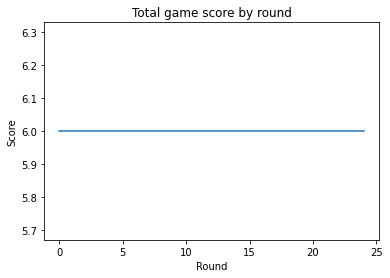

In [6]:
plt.plot(scores)
plt.xlabel('Round')
plt.ylabel('Score')
plt.title('Total game score by round')
plt.show()

In [7]:
def update_scene(num, frames, patch):
    patch.set_data(frames[num])
    return patch,

def plot_animation(frames, repeat=False, interval=20):
    fig = plt.figure()
    patch = plt.imshow(frames[0])
    plt.axis('off')
    anim = animation.FuncAnimation(
        fig, update_scene, fargs=(frames, patch),
        frames=len(frames), repeat=repeat, interval=interval)
    plt.close()
    return anim

In [8]:
plot_animation(frames)